In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import geopandas as gpd
import rasterio as rst
from rasterio.mask import mask

import warnings
warnings.filterwarnings("ignore")

In [5]:
entropy_f = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/florestal_entropy_reindex.csv')
entropy_s = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/savanica_entropy_reindex.csv')
entropy_c = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/campestre_entropy_reindex.csv')

alpha_f = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/florestal_alpha_angle_reindex.csv')
alpha_s = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/savanica_alpha_angle_reindex.csv')
alpha_c = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/campestre_alpha_angle_reindex.csv')

In [6]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

pink_patch = dict(facecolor='pink', color='k')
blue_patch = dict(facecolor='lightblue', color='k')
green_patch = dict(facecolor='lightgreen', color='k')
orange_patch = dict(facecolor='orange', color='k')
yellow_patch = dict(facecolor='yellow', color='k')

median_patch = dict(color='red')

(40.0, 70.0)

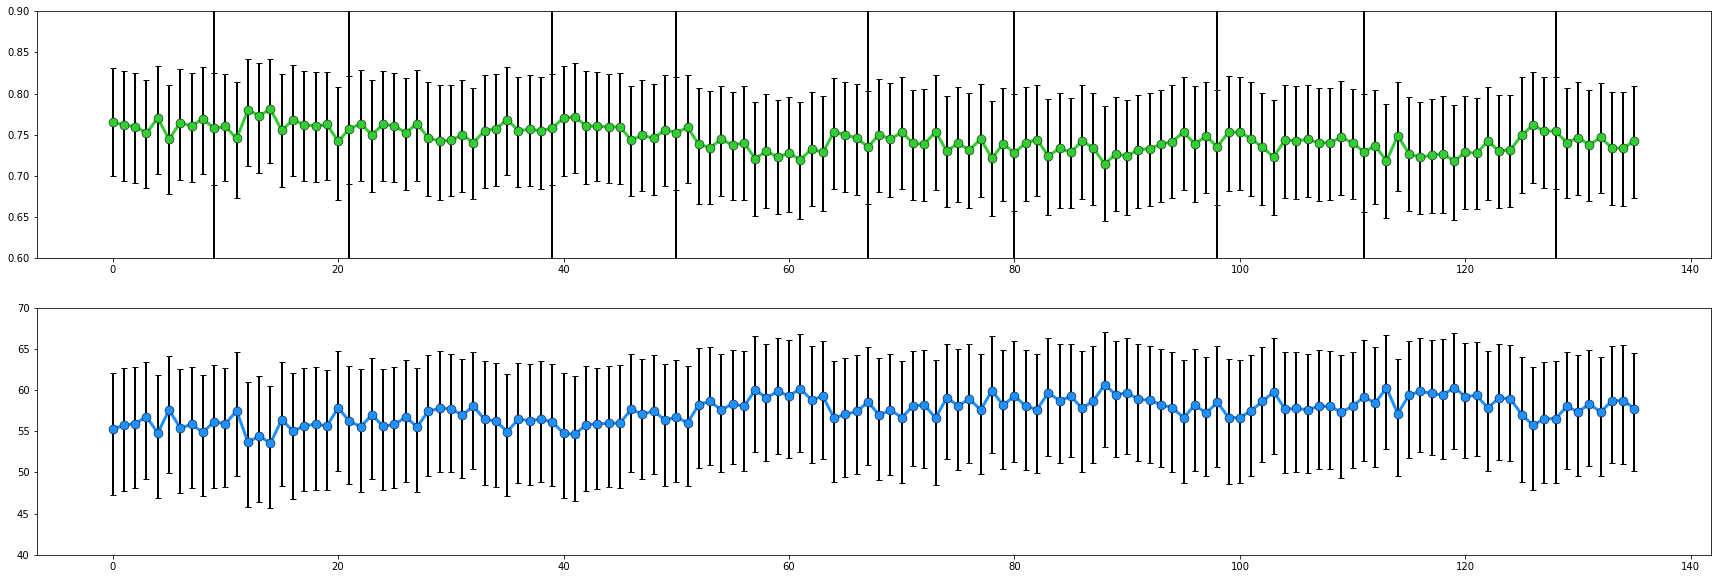

In [122]:
label_size = 20

fig, ax = plt.subplots(2,1, figsize=(30, 10))

ax[0].vlines(entropy_f.index[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
#ax[0,0].vlines(entropy_f.index[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax[0].vlines(entropy_f.index, ymin=entropy_f['percentile_25'], ymax=entropy_f['percentile_75'], colors='k', linewidth=2)
ax[0].plot(entropy_f.index, entropy_f['median'], 'limegreen', marker='o', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Entropy')
ax[0].plot(entropy_f.index, entropy_f['percentile_25'], 'ok', marker='_')
ax[0].plot(entropy_f.index, entropy_f['percentile_75'], 'ok', marker='_')
ax[0].set_ylim([0.6, 0.9])

ax[1].vlines(alpha_f.index, ymin=alpha_f['percentile_25'] * 100, ymax=alpha_f['percentile_75'] * 100, colors='k', linewidth=2)
ax[1].plot(alpha_f.index, alpha_f['median'] * 100, 'dodgerblue', marker='o', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Alpha Angle')
ax[1].plot(alpha_f.index, alpha_f['percentile_25'] * 100, 'ok', marker='_')
ax[1].plot(alpha_f.index, alpha_f['percentile_75'] * 100, 'ok', marker='_')
ax[1].set_ylim([40, 70])

In [99]:
roi = gpd.read_file('D:/thesis_data/ROI/classes/form_campestre_30m_32723.geojson')

roi_geom = roi.geometry.unary_union

In [100]:
slc_samples_path = 'D:/thesis_data/POL_DECOMP/rasters/'

with rst.open(slc_samples_path + 'S1_split_Orb_Cal_Deb_Sub_Mul_C2_Spk_Decomp_TC_20190102T084503_32723.tif') as raster_slc:
    image_slc, transform_slc = mask(raster_slc, [roi_geom], crop=True, nodata=np.nan)

    entropy = image_slc[0]
    anisotropy = image_slc[1]
    alpha_angle = image_slc[2]

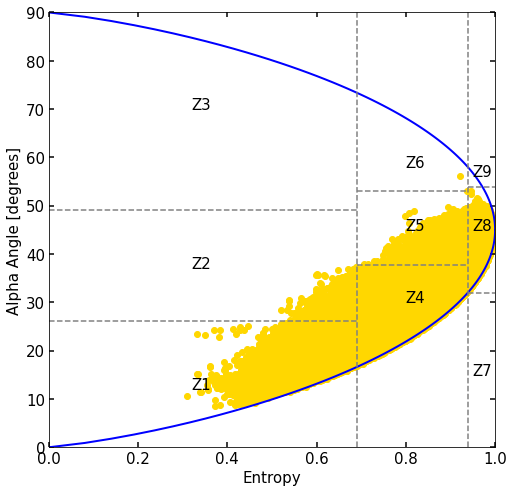

<Figure size 432x288 with 0 Axes>

In [102]:
def calc_h_alpha(C2):
    assert isinstance(C2, np.ndarray)
    assert C2.ndim >= 2
    assert C2.shape[-2:] == (2, 2)

    EPS = 1e-30
    eig_values, eig_vectors = np.linalg.eigh(C2)
    eig_values[eig_values < EPS] = EPS

    probs = eig_values / np.sum(eig_values, axis=-1, keepdims=True)

    h = -np.sum(probs * (np.log(probs) / np.log(2)), axis=-1)

    alpha = np.sum(probs * np.arccos(np.abs(eig_vectors[..., 0, :])), axis=-1)
    return h, np.degrees(alpha)


def curve1_C2(m):
    assert 0.0 <= m <= 1.0
    return np.array(
        [
            [1, 0],
            [0, m],
        ]
    )

def curve2_C2(m):
    assert 0.0 <= m <= 1.0
    return (
        np.array(
            [
                [m, 0],
                [0, 1],
            ]
        )      
    )

fig, ax = plt.subplots(figsize=(8, 8))

curve_style = {

    "color": "b",
    "linewidth": 2
}

ax.plot(*calc_h_alpha(np.array([curve1_C2(m) for m in np.linspace(0, 1, 100)])), **curve_style)
ax.plot(*calc_h_alpha(np.array([curve2_C2(m) for m in np.linspace(0, 1, 100)])), **curve_style)

bounds = [
    ([0, 0.69], [26.1, 26.1]),
    ([0, 0.69], [49.1, 49.1]),
    ([0.69, 0.69], [0.0, 90.0]),
    ([0.69, 0.94], [37.8, 37.8]),
    ([0.69, 0.94], [53.0, 53.0]),
    ([0.94, 0.94], [0.0, 90.0]),
    ([0.94, 1.0], [32.0, 32.0]),
    ([0.94, 1.0], [53.8, 53.8]),
]
for xs, ys in bounds:
    ax.plot(xs, ys, "--", color="gray")

ax.scatter(entropy, alpha_angle, c='gold')

ax.set_xlim(0, 1)
ax.set_ylim(0, 90)
ax.set_xlabel("Entropy", fontsize=15)
ax.set_ylabel("Alpha Angle [degrees]", fontsize=15)
ax.tick_params(top="on", right="on", direction="in")
ax.tick_params(axis='y', length=5, width=1.5, labelsize=15)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=15)

ax.text(0.32, 70, 'Z3', fontsize=15)
ax.text(0.32, 37, 'Z2', fontsize=15)
ax.text(0.32, 12, 'Z1', fontsize=15)

ax.text(0.8, 58, 'Z6', fontsize=15)
ax.text(0.8, 45, 'Z5', fontsize=15)
ax.text(0.8, 30, 'Z4', fontsize=15)

ax.text(0.95, 56, 'Z9', fontsize=15)
ax.text(0.95, 45, 'Z8', fontsize=15)
ax.text(0.95, 15, 'Z7', fontsize=15)

plt.show()

plt.savefig('C:/Users/jales/Desktop/gl_h_alpha.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)